# Recurrent Neural Networks.

- A recurrent neural network (RNN) is a type of artificial neural network which uses sequential data or time series data. (Sequential Modelling).
- These deep learning algorithms are commonly used for ordinal or temporal problems, such as language translation, natural language processing (nlp), speech recognition, and image captioning.
- They are incorporated into popular applications such as Siri, voice search, and Google Translate etc.

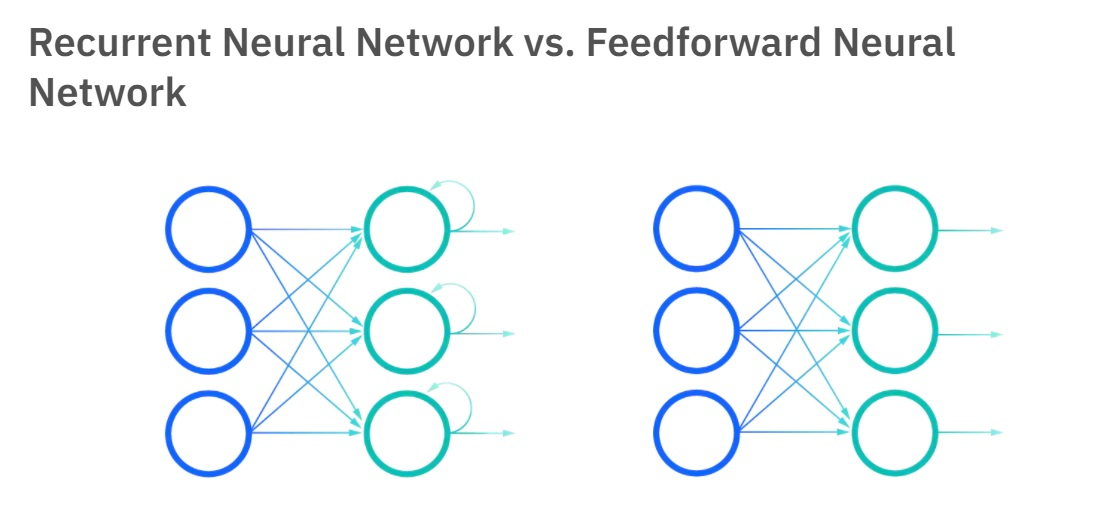

In [1]:
from IPython import display
display.Image("./rnn.jpg")

In [58]:
# standard imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
# import data 
df=pd.read_csv('data/data.csv',parse_dates=True,index_col='DATE')
df.head(2)

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524


In [61]:
# rename the RSCCASN column to sales 
df.columns=['Sales']
df.tail()

,Sales
DATE,
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791
2019-09-01,19695
2019-10-01,21113


<AxesSubplot:xlabel='DATE'>

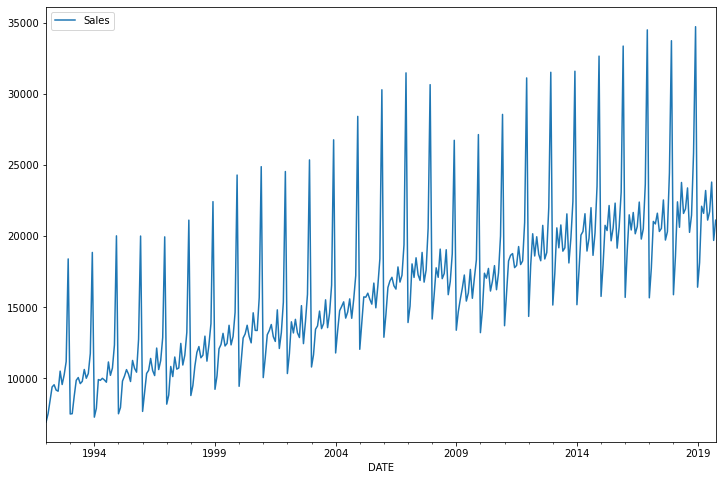

In [62]:
# plot the data 
df.plot(figsize=(12,8))

In [63]:
# check  the first and last date 
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [6]:
#first date 1992-01-01
#last date  2019-10-01

In [64]:
#total dataframe length
len(df)

334

In [65]:
#Data is monthly, let's forecast 1.5 years into the future.
len(df)-18

316

In [66]:
# test data 
test_size = 18
test_ind = len(df)- test_size

In [67]:
# training & test data 
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]
train.shape

(316, 1)

In [68]:
test.shape

(18, 1)

In [69]:
# scale the data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)


In [70]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# Let's redefine to get 12 months back and then predict the next month out
length = 12

# create an instance of the class and specify the input and output aspects of your time series problem (input,output,length of traning data )
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [77]:

# What does the first batch look like?
X,y = generator[0]

In [75]:
scaled_train[:15]

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654]])

In [79]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.02127505 0.05580163 0.08942056 0.09512053 0.08146965
 0.07860151 0.12979233 0.09566512 0.1203892  0.15426227 0.41595266]
Predict this y: 
 [[0.02047633]]


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

In [80]:
# We're only using one feature in our time series
n_features = 1
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(100,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 100)               10200     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [83]:
# Stop training when a monitored metric has stopped improving
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=5)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)
# fit model
model.fit(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
304/304 [==============================] - 2s 8ms/step - loss: 0.0070 - val_loss: 0.0159
Epoch 2/20
304/304 [==============================] - 2s 8ms/step - loss: 0.0051 - val_loss: 0.0025
Epoch 3/20
304/304 [==============================] - 3s 8ms/step - loss: 0.0057 - val_loss: 0.0018
Epoch 4/20
304/304 [==============================] - 2s 8ms/step - loss: 0.0025 - val_loss: 0.0146
Epoch 5/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0057 - val_loss: 0.0011
Epoch 6/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0052 - val_loss: 0.0013
Epoch 7/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0063 - val_loss: 0.0041
Epoch 8/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0051 - val_loss: 0.0161
Epoch 9/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0048 - val_loss: 0.0012
Epoch 10/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0040 - val_loss: 0.0027

<AxesSubplot:>

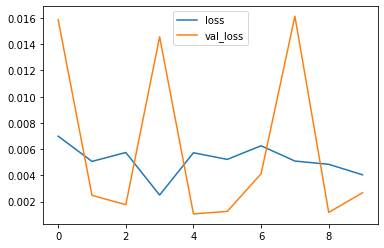

In [84]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [85]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
first_eval_batch

array([[0.53252977],
       [0.48591345],
       [0.49364653],
       [0.56629393],
       [0.46405751],
       [0.48536886],
       [0.63534708],
       [0.97233517],
       [0.32468051],
       [0.42285071],
       [0.5615016 ],
       [0.49658728]])

In [86]:
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
current_batch

array([[[0.43855867],
        [0.87116998],
        [0.39263105],
        [0.43712753],
        [0.50670385],
        [0.54108357],
        [0.45583618],
        [0.47686997],
        [0.31126827],
        [0.65233755],
        [0.3067525 ],
        [0.57362443]]])

In [87]:
test_predictions

[array([0.49194515], dtype=float32),
 array([0.43584722], dtype=float32),
 array([0.41604182], dtype=float32),
 array([0.5948545], dtype=float32),
 array([0.38827935], dtype=float32),
 array([0.51306987], dtype=float32),
 array([0.43855867], dtype=float32),
 array([0.87117], dtype=float32),
 array([0.39263105], dtype=float32),
 array([0.43712753], dtype=float32),
 array([0.50670385], dtype=float32),
 array([0.5410836], dtype=float32),
 array([0.45583618], dtype=float32),
 array([0.47686997], dtype=float32),
 array([0.31126827], dtype=float32),
 array([0.65233755], dtype=float32),
 array([0.3067525], dtype=float32),
 array([0.57362443], dtype=float32)]

In [88]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[20488.13714314],
       [18942.97590494],
       [18397.45592427],
       [23322.67163372],
       [17632.76637816],
       [21069.99644661],
       [19017.65994859],
       [30933.50604868],
       [17752.6297493 ],
       [18978.24070215],
       [20894.65094376],
       [21841.60597038],
       [19493.55165577],
       [20072.90646911],
       [15511.57322931],
       [24905.98550797],
       [15387.19094038],
       [22737.9113574 ]])

In [89]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

<ipython-input-89-53e06c23926f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [90]:
test['Loss'] = abs(test['Sales'] - test['Predictions'])

<ipython-input-90-9515f4111cc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Loss'] = abs(test['Sales'] - test['Predictions'])


In [92]:
test.head()

,Sales,Predictions,Loss
DATE,,,
2018-05-01,23764,20488.137143,3275.862857
2018-06-01,21589,18942.975905,2646.024095
2018-07-01,21919,18397.455924,3521.544076
2018-08-01,23381,23322.671634,58.328366
2018-09-01,20260,17632.766378,2627.233622


In [91]:
sum(test['Loss'])

44754.330620765715

<AxesSubplot:xlabel='DATE'>

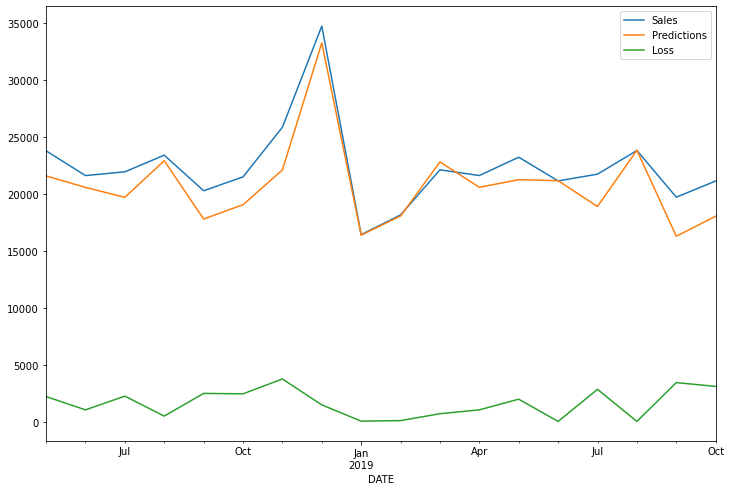

In [30]:
test.plot(figsize=(12,8))

- This kind of RNN suffered from the problem of <b>vanishing & exploding gradients </b>hence unable to model long term dependencies.
- Therefore, LSTM and GRU were developed to solve the problem with traditional RNNS.
- There two architecture use mechanisms known as <b>Gates</b>

In [31]:
#model
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [32]:
# We're only using one feature in our time series
n_features = 1

In [93]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [94]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [98]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [99]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

In [100]:
# fit model
model.fit(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
304/304 [==============================] - 4s 12ms/step - loss: 0.0066 - val_loss: 0.0026
Epoch 2/20
304/304 [==============================] - 4s 11ms/step - loss: 0.0032 - val_loss: 0.0016
Epoch 3/20
304/304 [==============================] - 4s 12ms/step - loss: 0.0021 - val_loss: 5.6568e-04
Epoch 4/20
304/304 [==============================] - 4s 12ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 5/20
304/304 [==============================] - 3s 11ms/step - loss: 0.0014 - val_loss: 3.9475e-04
Epoch 6/20
304/304 [==============================] - 3s 11ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 7/20
304/304 [==============================] - 3s 11ms/step - loss: 0.0011 - val_loss: 7.9325e-04
Epoch 8/20
304/304 [==============================] - 3s 10ms/step - loss: 0.0011 - val_loss: 0.0031
Epoch 9/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0010 - val_loss: 0.0029
Epoch 10/20
304/304 [==============================] - 3s 10ms/step - loss: 0.00

In [101]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

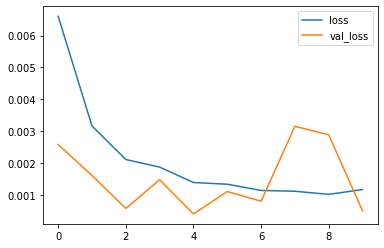

In [102]:
losses.plot()

Evaluate on Test Data¶


In [103]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [104]:
true_predictions = scaler.inverse_transform(test_predictions)

In [106]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

<ipython-input-106-53e06c23926f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [107]:
test['Loss'] = abs(test['Sales'] - test['Predictions'])

<ipython-input-107-9515f4111cc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Loss'] = abs(test['Sales'] - test['Predictions'])


In [108]:
sum(test['Loss'])

12412.685626268418

In [109]:
test.head()

,Sales,Predictions,Loss
DATE,,,
2018-05-01,23764,21734.796977,2029.203023
2018-06-01,21589,20597.087800,991.912200
2018-07-01,21919,20815.283807,1103.716193
2018-08-01,23381,22734.356968,646.643032
2018-09-01,20260,20117.690956,142.309044


<AxesSubplot:xlabel='DATE'>

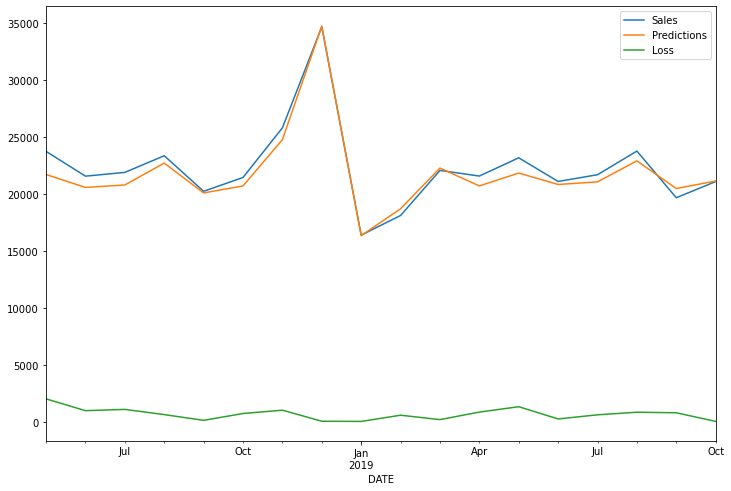

In [110]:
test.plot(figsize=(12,8))

In [111]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [112]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [116]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
#model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# fit model
model.fit(generator,epochs=8)


Epoch 1/8
322/322 [==============================] - 6s 10ms/step - loss: 0.0259
Epoch 2/8
322/322 [==============================] - 4s 11ms/step - loss: 0.0186
Epoch 3/8
322/322 [==============================] - 4s 11ms/step - loss: 0.0095
Epoch 4/8
322/322 [==============================] - 4s 12ms/step - loss: 0.0039
Epoch 5/8
322/322 [==============================] - 4s 12ms/step - loss: 0.0027
Epoch 6/8
322/322 [==============================] - 4s 11ms/step - loss: 0.0018
Epoch 7/8
322/322 [==============================] - 4s 12ms/step - loss: 0.0017
Epoch 8/8
322/322 [==============================] - 4s 11ms/step - loss: 0.0015


In [117]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [118]:
forecast = scaler.inverse_transform(forecast)

In [119]:
forecast_index = pd.date_range(start='2019-11-01',periods=periods,freq='MS')

In [120]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [121]:
forecast_df

,Forecast
2019-11-01,27389.031102
2019-12-01,38743.931335
2020-01-01,17034.761281
2020-02-01,19089.490630
2020-03-01,23214.491779
2020-04-01,22736.331994
2020-05-01,24366.882308
2020-06-01,22272.685281
2020-07-01,22914.980698
2020-08-01,25008.304314


<AxesSubplot:>

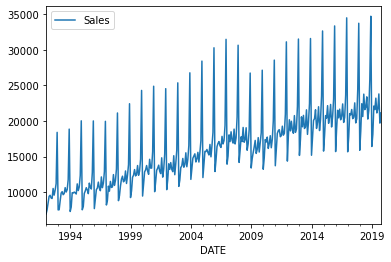

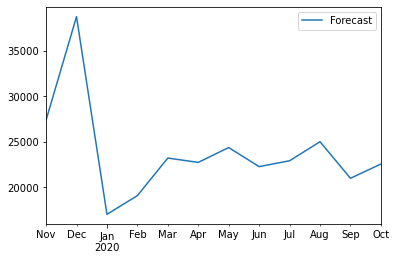

In [122]:
df.plot()
forecast_df.plot()

<AxesSubplot:xlabel='DATE'>

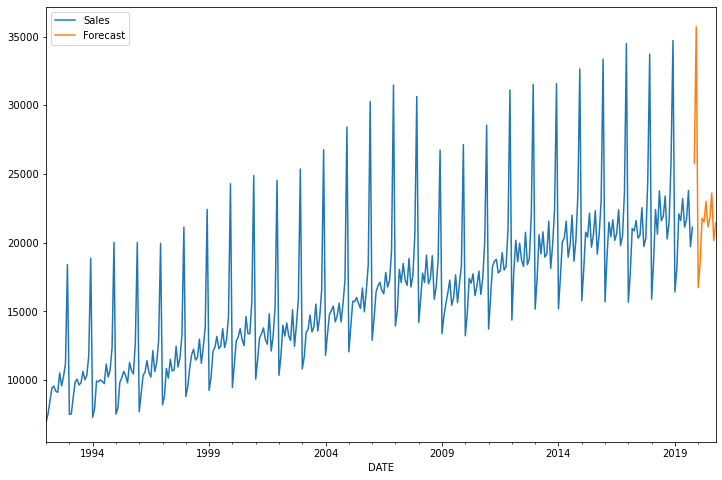

In [56]:
ax = df.plot(figsize=(12,8))
forecast_df.plot(ax=ax)

(576.0, 611.0)

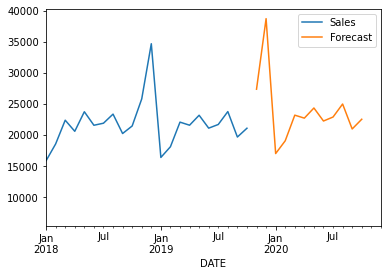

In [123]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')

# END